<a href="https://colab.research.google.com/github/Belal-AI/Rev-Projects/blob/main/practical_ML_and_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.svm import LinearSVC

In [5]:
from sklearn import datasets

In [6]:
iris=datasets.load_iris()

In [7]:
x=iris.data
columns=iris.feature_names
data=pd.DataFrame(data=x,columns=columns)
data['target']=iris.target

In [8]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [10]:
corr=data.corr()

<Axes: >

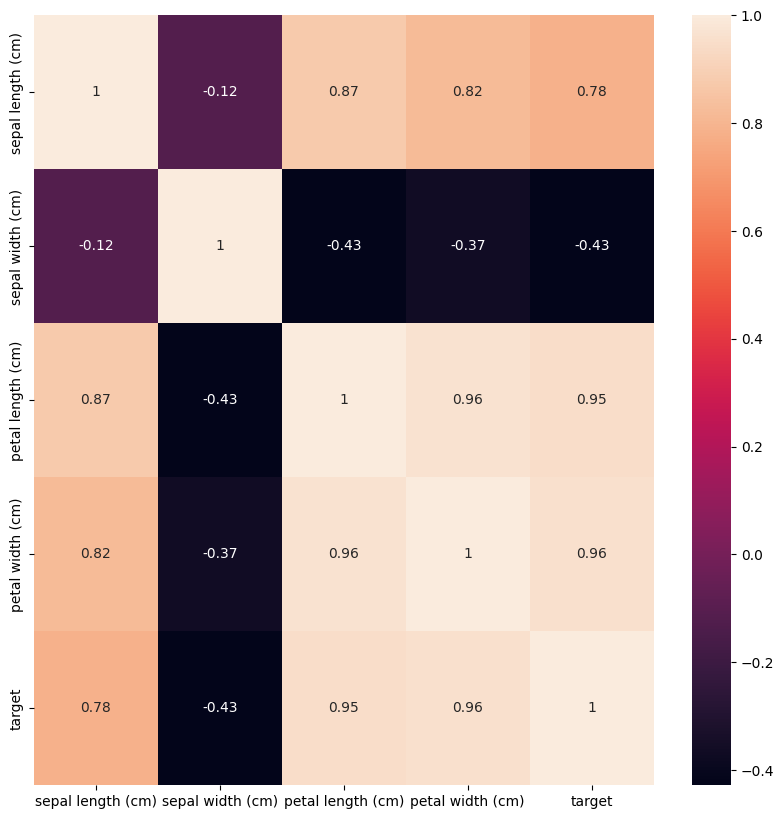

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data=corr,annot=True)

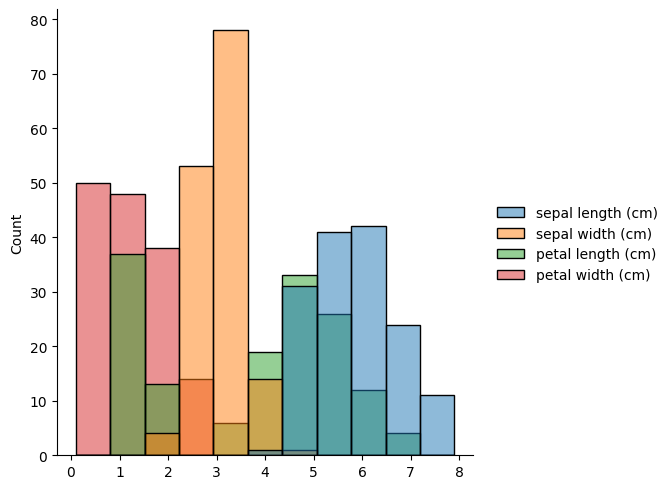

In [12]:
sns.displot(data=data.iloc[:,:-1])

In [13]:
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

<ipython-input-14-6e4d530613e4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],label=i)
<ipython-input-14-6e4d530613e4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],label=i)
<ipython-input-14-6e4d530613e4>:5: UserWarning: 

`distplot` is a deprecated function and will be re

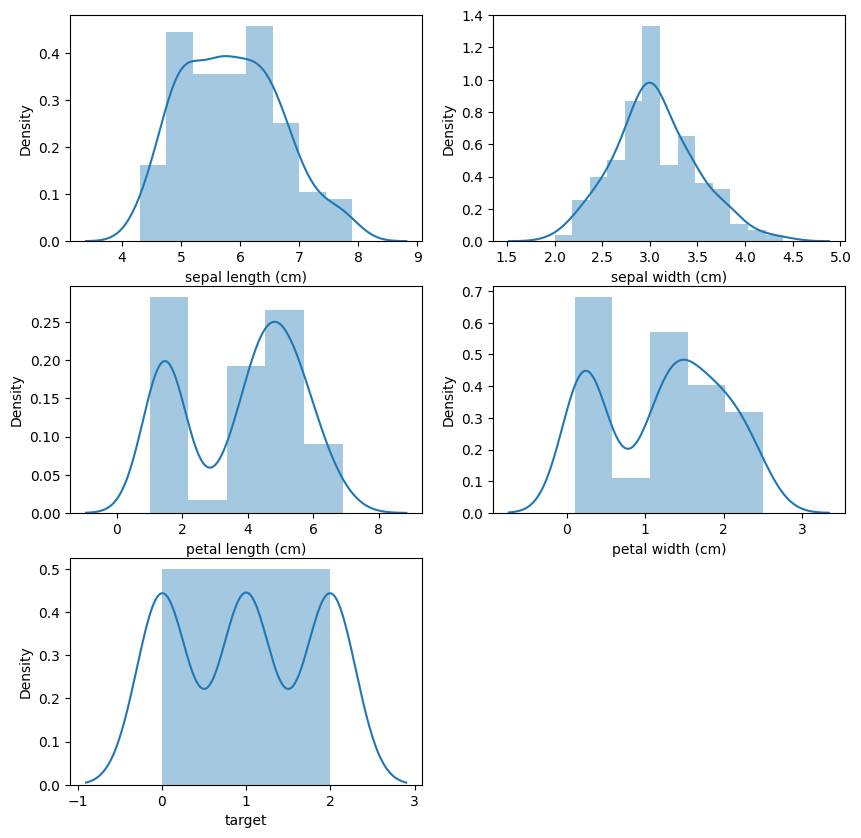

In [14]:
plt.figure(figsize=(10,10))
j=0
for i in data :
  plt.subplot(3,2,j+1)
  sns.distplot(data[i],label=i)
  j+=1

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
trainx,testx,trainy,testy=train_test_split(data.iloc[:,:-1],data.iloc[:,-1])

In [17]:
trainy.shape

(112,)

In [18]:
from sklearn.multiclass import OneVsRestClassifier

In [19]:
svc=LinearSVC(C=2,loss="hinge")

In [20]:
model=OneVsRestClassifier(svc)

In [21]:
model.fit(trainx,trainy)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


OneVsRestClassifier(estimator=LinearSVC(C=2, loss='hinge'))

In [22]:
model.predict(testx)

array([0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 0, 0, 0,
       1, 2, 1, 0, 2, 2, 1, 2, 1, 1, 2, 0, 1, 2, 1, 0])

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(testy,model.predict(testx))

0.9473684210526315

In [25]:
data=pd.read_csv("airlinedelaycauses_DelayedFlights.csv")
data

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107841,344983,2008,1,28,1,1841.0,1835,2056.0,2050,EV,...,5.0,16.0,0,N,0,NaN,NaN,NaN,NaN,NaN
107842,344984,2008,1,29,2,1923.0,1835,2127.0,2050,EV,...,4.0,17.0,0,N,0,28.0,0.0,0.0,0.0,9.0
107843,344986,2008,1,31,4,1851.0,1835,2053.0,2050,EV,...,5.0,18.0,0,N,0,NaN,NaN,NaN,NaN,NaN
107844,344987,2008,1,3,4,1615.0,1545,1818.0,1750,EV,...,12.0,8.0,0,N,0,28.0,0.0,0.0,0.0,0.0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107846 entries, 0 to 107845
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         107846 non-null  int64  
 1   Year               107846 non-null  int64  
 2   Month              107846 non-null  int64  
 3   DayofMonth         107846 non-null  int64  
 4   DayOfWeek          107846 non-null  int64  
 5   DepTime            107846 non-null  float64
 6   CRSDepTime         107846 non-null  int64  
 7   ArrTime            107534 non-null  float64
 8   CRSArrTime         107846 non-null  int64  
 9   UniqueCarrier      107846 non-null  object 
 10  FlightNum          107846 non-null  int64  
 11  TailNum            107846 non-null  object 
 12  ActualElapsedTime  107534 non-null  float64
 13  CRSElapsedTime     107846 non-null  float64
 14  AirTime            107534 non-null  float64
 15  ArrDelay           107534 non-null  float64
 16  De

In [27]:
data.isna().sum()

Unnamed: 0               0
Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                312
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  0
ActualElapsedTime      312
CRSElapsedTime           0
AirTime                312
ArrDelay               312
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                 312
TaxiOut                  0
Cancelled                0
CancellationCode         0
Diverted                 0
CarrierDelay         37890
WeatherDelay         37890
NASDelay             37890
SecurityDelay        37890
LateAircraftDelay    37891
dtype: int64

In [28]:
data.fillna(data.mean(),inplace=True)

<ipython-input-28-d85acd3950fb>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(),inplace=True)


In [29]:
data.isna().sum()

Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

<Figure size 2000x2000 with 0 Axes>

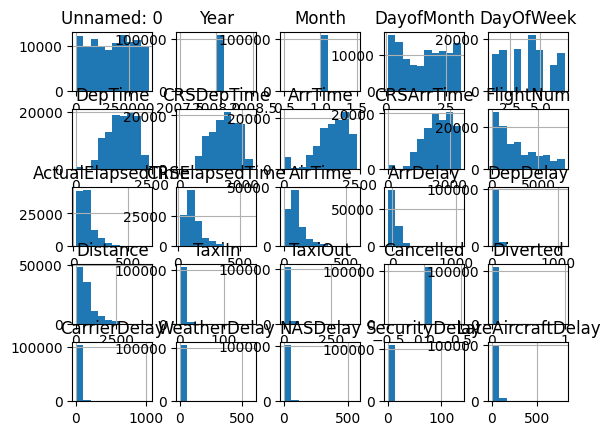

In [30]:
plt.figure(figsize=(20,20))
data.hist()
plt.show()

<Axes: >

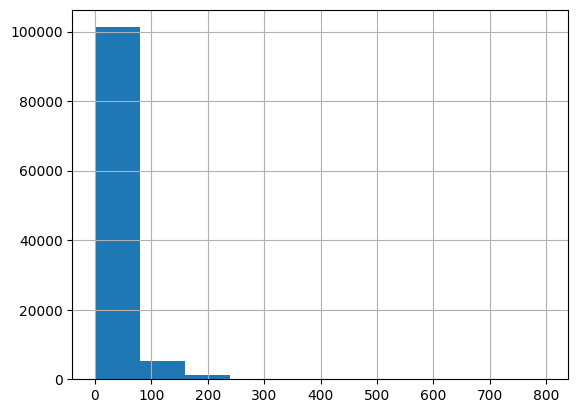

In [31]:
data["LateAircraftDelay"].hist()

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [33]:
data=pd.get_dummies(data=data)
data

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Dest_TUS,Dest_TVC,Dest_TWF,Dest_TYS,Dest_VLD,Dest_VPS,Dest_XNA,Dest_YKM,Dest_YUM,CancellationCode_N
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,335,...,0,0,0,0,0,0,0,0,0,1
1,1,2008,1,3,4,754.0,735,1002.0,1000,3231,...,0,0,0,0,0,0,0,0,0,1
2,2,2008,1,3,4,628.0,620,804.0,750,448,...,0,0,0,0,0,0,0,0,0,1
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,3920,...,0,0,0,0,0,0,0,0,0,1
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,378,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107841,344983,2008,1,28,1,1841.0,1835,2056.0,2050,4885,...,0,0,0,0,0,0,0,0,0,1
107842,344984,2008,1,29,2,1923.0,1835,2127.0,2050,4885,...,0,0,0,0,0,0,0,0,0,1
107843,344986,2008,1,31,4,1851.0,1835,2053.0,2050,4885,...,0,0,0,0,0,0,0,0,0,1
107844,344987,2008,1,3,4,1615.0,1545,1818.0,1750,4885,...,0,0,0,0,0,0,0,0,0,1


In [34]:
data=scaler.fit_transform(X=data.iloc[:,:-1],y=data.iloc[:,-1])

In [40]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y =train_test_split(data[:,:-1],data[:,-1])

#we need to create regression model with l1 or l2 regularization 
#with kernal polynomial and pipline  with SVR or Linear model as lasoo or rigde or elasticnet dosnet matter